<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/34_JapaneseStable_VLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# パッケージのインストール
!pip install transformers accelerate sentencepiece protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00


In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [3]:
from transformers import AutoTokenizer, AutoModelForVision2Seq, AutoImageProcessor

# モデルとトークナイザーとプロセッサーの準備
model = AutoModelForVision2Seq.from_pretrained(
    "stabilityai/japanese-stable-vlm",
    trust_remote_code=True
).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(
    "stabilityai/japanese-stable-vlm"
)
processor = AutoImageProcessor.from_pretrained(
    "stabilityai/japanese-stable-vlm"
)

config.json:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

configuration_llava.py:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stabilityai/japanese-stable-vlm:
- configuration_llava.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_llava.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stabilityai/japanese-stable-vlm:
- modeling_llava.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/944 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/494 [00:00<?, ?B/s]

In [9]:
from PIL import Image
import requests

# プロンプトの準備
prompt = """
以下は、タスクを説明する指示と、文脈のある入力の組み合わせです。要求を適切に満たす応答を書きなさい。

### 指示:
画像を詳細に述べてください。

### 応答:
"""

# 入力画像の準備
url = "https://assets.st-note.com/img/1699330153755-AtaoOsjEq4.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [10]:
# 入力の準備
inputs = processor(images=image, return_tensors="pt")
text_encoding = tokenizer(prompt, add_special_tokens=False, return_tensors="pt")
inputs.update(text_encoding)

In [11]:
# 推論の実行
outputs = model.generate(
    **inputs.to(device=model.device),
    do_sample=False,
    num_beams=5,
    max_new_tokens=128,
    min_length=1,
    repetition_penalty=1.5,
)
generated_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0].strip()

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


猫がテレビの前のテーブルに横たわっています


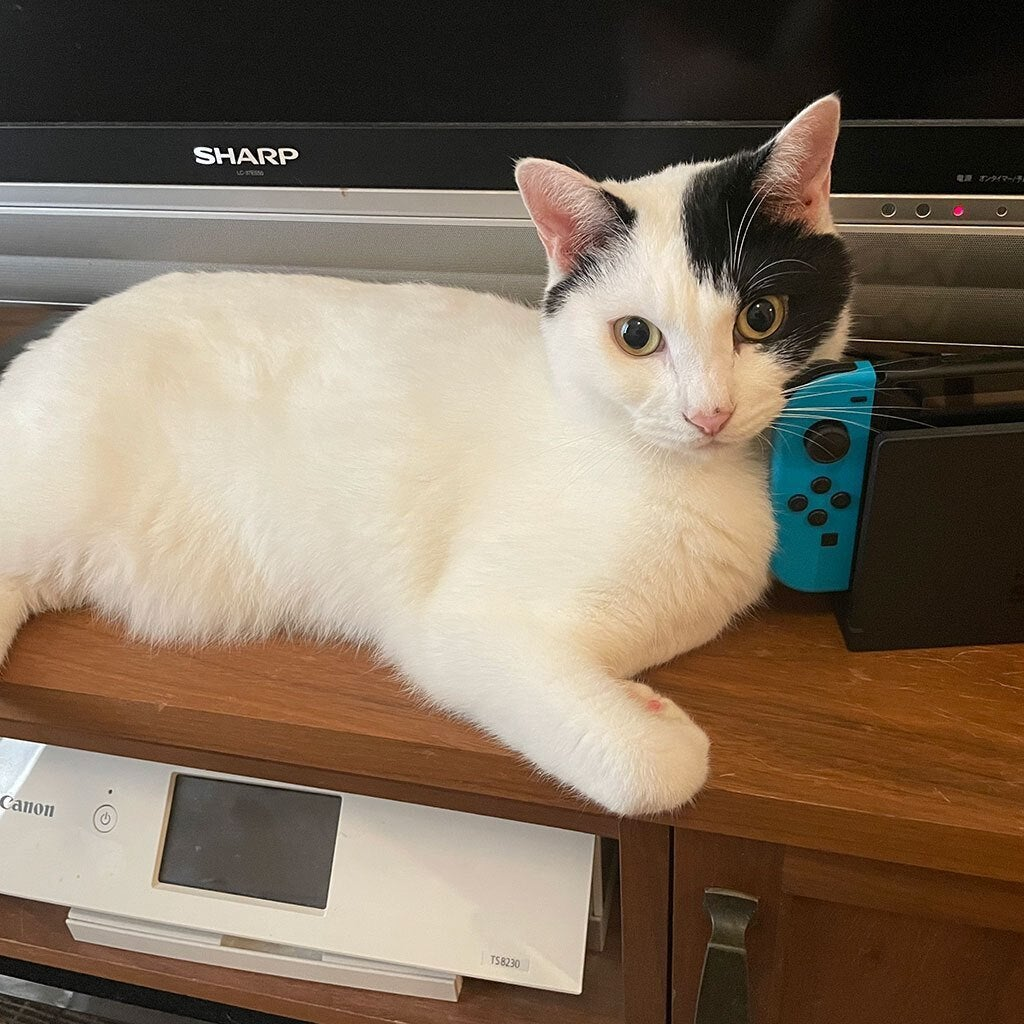

In [12]:
print(generated_text)
image